# **The Visualization of $k$-Nearest Neighbors Algorithm**

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a $k$ value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a $k$ value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of $k$. But hopefully from this diagram, you should get a sense of what the $k$-Nearest Neighbors algorithm is. It considers the $k$ Nearest Neighbors (points) when it predicts the classification of the test point.

# **Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Basic/k-Nearest Neighbors/Data/teleCust1000t.csv')

# **Exploratory Data Analysis (EDA)**

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Note**

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows :

1 = Basic Service

2 = E-Service

3 = Plus Service

4 = Total Service

In [9]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


# **Define Independent & Dependent Features**

In [15]:
X = df.drop('custcat', axis=1)
y = df['custcat']

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# **Data Splitting**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# **Modelling**

## **$k$ = 4**

In [22]:
neighbors4 = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
neighbors4

KNeighborsClassifier(n_neighbors=4)

## **$k$ = 6**

In [23]:
neighbors6 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
neighbors6

KNeighborsClassifier(n_neighbors=6)

## **$k$ = 8**

In [24]:
neighbors8 = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
neighbors8

KNeighborsClassifier(n_neighbors=8)

# **Predict**

## **$k$ = 4**

In [25]:
y_pred_4 = neighbors4.predict(X_test)
y_pred_4[0:5]

array([1, 1, 3, 2, 4])

In [26]:
print("Train set Accuracy with k is 4 : ", metrics.accuracy_score(y_train, neighbors4.predict(X_train)))
print("Test set Accuracy with k is 4 : ", metrics.accuracy_score(y_test, y_pred_4))

Train set Accuracy with k is 4 :  0.5475
Test set Accuracy with k is 4 :  0.32


## **$k$ = 6**

In [27]:
y_pred_6 = neighbors6.predict(X_test)
y_pred_6[0:5]

array([3, 3, 3, 4, 4])

In [28]:
print("Train set Accuracy with k is 6 : ", metrics.accuracy_score(y_train, neighbors6.predict(X_train)))
print("Test set Accuracy with k is 6 : ", metrics.accuracy_score(y_test, y_pred_6))

Train set Accuracy with k is 6 :  0.51625
Test set Accuracy with k is 6 :  0.31


## **$k$ = 8**

In [29]:
y_pred_8 = neighbors8.predict(X_test)
y_pred_8[0:5]

array([3, 2, 3, 2, 4])

In [30]:
print("Train set Accuracy with k is 8 : ", metrics.accuracy_score(y_train, neighbors8.predict(X_train)))
print("Test set Accuracy with k is 8 : ", metrics.accuracy_score(y_test, y_pred_8))

Train set Accuracy with k is 8 :  0.4925
Test set Accuracy with k is 8 :  0.325


**Note**

$k$ in k-Nearest Neighbors is the number of nearest neighbors to examine. It it supposed to be specified by the user. SO, how can we choose right value of $k$ ?

The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose $k$ = 1, use the training part for modelling, and calculate the accuracy of prediction using all samples in your test set. Repeat this proccess, increasing the $k$, and see which $k$ is the best for your model.

# **Tuning the best $k$**

In [31]:
k_value = 10
mean_acc = np.zeros((k_value-1))
std_acc = np.zeros((k_value-1))

for n in range(1, k_value):
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_pred = neighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    std_acc[n-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

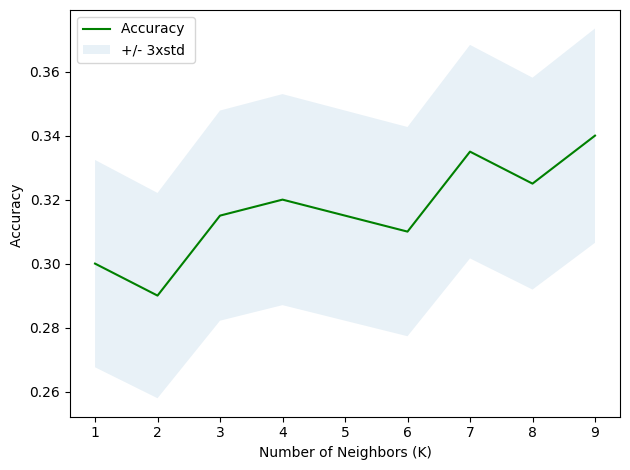

In [33]:
plt.plot(range(1, k_value), mean_acc, 'g')
plt.fill_between(range(1, k_value), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [34]:
print('The best accuracy was with', mean_acc.max(), 'with k = ', mean_acc.argmax()+1)

The best accuracy was with 0.34 with k =  9


# **Lest try with $k$ = 9**

In [36]:
neighbors9 = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
neighbors9

KNeighborsClassifier(n_neighbors=9)

In [37]:
y_pred_9 = neighbors9.predict(X_test)
y_pred_9[0:5]

array([3, 1, 3, 2, 4])

In [38]:
print("Train set Accuracy with k is 9 : ", metrics.accuracy_score(y_train, neighbors9.predict(X_train)))
print("Test set Accuracy with k is 9 : ", metrics.accuracy_score(y_test, y_pred_9))

Train set Accuracy with k is 9 :  0.5025
Test set Accuracy with k is 9 :  0.34
